In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
df = pd.read_csv('emo09my.csv')#, sep='\t')
df = df.T
print(df.head())
df = df[1:]

                 0        1       2      3        4       5         6   7
Unnamed: 0   angry  disgust    fear  happy  neutral     sad  surprise  dw
2018-04-06   8.00%    0.00%   8.00%  0.00%   12.00%  68.00%     4.00%   5
2018-04-07   0.00%    0.00%   0.00%  0.00%   71.43%  28.57%     0.00%   6
2018-04-08   0.00%    0.00%  38.89%  5.56%    5.56%  50.00%     0.00%   7
2018-04-09  33.33%    0.00%   8.33%  0.00%   16.67%  41.67%     0.00%   1


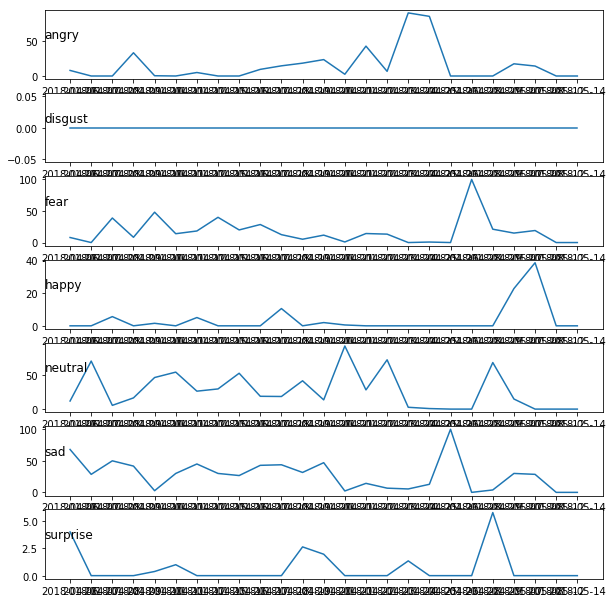

In [2]:
df.columns = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise", "dw"]
#dataset.index.name = 'date'
#df.values = df.values.astype('float32')
cols_to_plot = df.columns
i = 1
# plot each column
plt.figure(figsize = (10,12))
for col in cols_to_plot:
    if col == "dw":
        df[col] = df[col].astype(int)
        break
    df[col] = df[col].replace("%","", regex=True).astype(float)
    plt.subplot(len(cols_to_plot), 1, i)
    plt.plot(df[col])
    plt.title(col, y=0.5, loc='left')
    i += 1
plt.show()


In [3]:
## One-hot encode 'cbwd'
#temp = pd.get_dummies(df['cbwd'], prefix='cbwd')
#df = pd.concat([df, temp], axis = 1)
#del df['cbwd'], temp
 
## Split into train and test
df_train = df.iloc[:(-1), :].copy()
df_test = df.iloc[-22:, :].copy()
 
## take out the useful columns for modeling - you may also keep 'hour', 'day' or 'month' and to see if that will improve your accuracy
X_train = df_train.loc[:, ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise", "dw"]].values.copy()
X_test = df_test.loc[:, ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise", "dw"]].values.copy()
all_y_train = []
all_y_test = []
for col in cols_to_plot:
    if col == 'dw':
        break
    all_y_train.append(df_train[col].values.copy().reshape(-1, 1))
    all_y_test.append(df_test[col].values.copy().reshape(-1, 1))
    
    
## z-score transform x - not including those one-how columns!
#for i in range(X_train.shape[1]-4):
#    temp_mean = X_train[:, i].mean()
#    temp_std = X_train[:, i].std()
#    X_train[:, i] = (X_train[:, i] - temp_mean) / temp_std
#    X_test[:, i] = (X_test[:, i] - temp_mean) / temp_std
 
## z-score transform y
#y_mean = y_train.mean()
#y_std = y_train.std()
#y_train = (y_train - y_mean) / y_std
#y_test = (y_test - y_mean) / y_std

print(len(all_y_train[0]), len(all_y_test[0]), len(X_test), len(X_train))
#print(y_test)
#print(all_y_test[0])

24 22 22 24


In [4]:
input_seq_len = 7
output_seq_len = 1

# x = X_train, y = y_train
def generate_train_samples(y, x = X_train, batch_size = 10, input_seq_len = input_seq_len, output_seq_len = output_seq_len):
    total_start_points = len(x) - input_seq_len - output_seq_len
    #print(total_start_points, len(x), input_seq_len, output_seq_len)
    start_x_idx = np.random.choice(range(total_start_points), batch_size, replace = True)
 
    input_batch_idxs = [list(range(i, i+input_seq_len)) for i in start_x_idx]
    input_seq = np.take(x, input_batch_idxs, axis = 0)
 
    output_batch_idxs = [list(range(i+input_seq_len, i+input_seq_len+output_seq_len)) for i in start_x_idx]
    output_seq = np.take(y, output_batch_idxs, axis = 0)
 
    return input_seq, output_seq # in shape: (batch_size, time_steps, feature_dim)

# y = y_test
def generate_test_samples(y, x = X_test, input_seq_len = input_seq_len, output_seq_len = output_seq_len):
    total_samples = x.shape[0]
    #print(total_samples)
    
    input_batch_idxs = [list(range(i, i+input_seq_len)) for i in range((total_samples-input_seq_len-output_seq_len))]
    input_seq = np.take(x, input_batch_idxs, axis = 0)
 
    output_batch_idxs = [list(range(i+input_seq_len, i+input_seq_len+output_seq_len)) for i in range((total_samples-input_seq_len-output_seq_len))]
    #print(output_batch_idxs)
    output_seq = np.take(y, output_batch_idxs, axis = 0)
 
    return input_seq, output_seq

In [5]:
all_y = []
for il in all_y_train:
    x, y = generate_train_samples(il)
    all_y.append(y)
    print('train', x.shape, y.shape)

all_ty = []
for itl in all_y_test:    
    test_x, test_y = generate_test_samples(itl)
    all_ty.append(test_y)
    print('test', test_x.shape, test_y.shape)
#print('x', x, '\n y', y)
#print('tx', test_x, '\n ty', test_y)

train (10, 7, 8) (10, 1, 1)
train (10, 7, 8) (10, 1, 1)
train (10, 7, 8) (10, 1, 1)
train (10, 7, 8) (10, 1, 1)
train (10, 7, 8) (10, 1, 1)
train (10, 7, 8) (10, 1, 1)
train (10, 7, 8) (10, 1, 1)
test (14, 7, 8) (14, 1, 1)
test (14, 7, 8) (14, 1, 1)
test (14, 7, 8) (14, 1, 1)
test (14, 7, 8) (14, 1, 1)
test (14, 7, 8) (14, 1, 1)
test (14, 7, 8) (14, 1, 1)
test (14, 7, 8) (14, 1, 1)


In [6]:
from tensorflow.contrib import rnn
from tensorflow.python.ops import variable_scope
from tensorflow.python.framework import dtypes
import tensorflow as tf
import copy
import os

## Parameters
learning_rate = 0.01
lambda_l2_reg = 0.002  

## Network Parameters
# length of input signals
input_seq_len = input_seq_len
# length of output signals
output_seq_len = output_seq_len
# size of LSTM Cell
hidden_dim = 64 
# num of input signals
input_dim = X_train.shape[1]
# num of output signals
output_dim = y.shape[1]
# num of stacked lstm layers 
num_stacked_layers = 3 
# gradient clipping - to avoid gradient exploding
GRADIENT_CLIPPING = 3.0

def build_graph(feed_previous = False):
    
    tf.reset_default_graph()
    
    global_step = tf.Variable(
                  initial_value=0,
                  name="global_step",
                  trainable=False,
                  collections=[tf.GraphKeys.GLOBAL_STEP, tf.GraphKeys.GLOBAL_VARIABLES])
    
    weights = {
        'out': tf.get_variable('Weights_out', \
                               shape = [hidden_dim, output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.truncated_normal_initializer()),
    }
    biases = {
        'out': tf.get_variable('Biases_out', \
                               shape = [output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.constant_initializer(0.)),
    }
                                          
    with tf.variable_scope('Seq2seq'):
        # Encoder: inputs
        enc_inp = [
            tf.placeholder(tf.float32, shape=(None, input_dim), name="inp_{}".format(t))
               for t in range(input_seq_len)
        ]

        # Decoder: target outputs
        target_seq = [
            tf.placeholder(tf.float32, shape=(None, output_dim), name="y".format(t))
              for t in range(output_seq_len)
        ]

        # Give a "GO" token to the decoder. 
        # If dec_inp are fed into decoder as inputs, this is 'guided' training; otherwise only the 
        # first element will be fed as decoder input which is then 'un-guided'
        dec_inp = [ tf.zeros_like(target_seq[0], dtype=tf.float32, name="GO") ] + target_seq[:-1]

        with tf.variable_scope('LSTMCell'): 
            cells = []
            for i in range(num_stacked_layers):
                with tf.variable_scope('RNN_{}'.format(i)):
                    cells.append(tf.contrib.rnn.LSTMCell(hidden_dim))
            cell = tf.contrib.rnn.MultiRNNCell(cells)
         
        def _rnn_decoder(decoder_inputs,
                        initial_state,
                        cell,
                        loop_function=None,
                        scope=None):
          """RNN decoder for the sequence-to-sequence model.
          Args:
            decoder_inputs: A list of 2D Tensors [batch_size x input_size].
            initial_state: 2D Tensor with shape [batch_size x cell.state_size].
            cell: rnn_cell.RNNCell defining the cell function and size.
            loop_function: If not None, this function will be applied to the i-th output
              in order to generate the i+1-st input, and decoder_inputs will be ignored,
              except for the first element ("GO" symbol). This can be used for decoding,
              but also for training to emulate http://arxiv.org/abs/1506.03099.
              Signature -- loop_function(prev, i) = next
                * prev is a 2D Tensor of shape [batch_size x output_size],
                * i is an integer, the step number (when advanced control is needed),
                * next is a 2D Tensor of shape [batch_size x input_size].
            scope: VariableScope for the created subgraph; defaults to "rnn_decoder".
          Returns:
            A tuple of the form (outputs, state), where:
              outputs: A list of the same length as decoder_inputs of 2D Tensors with
                shape [batch_size x output_size] containing generated outputs.
              state: The state of each cell at the final time-step.
                It is a 2D Tensor of shape [batch_size x cell.state_size].
                (Note that in some cases, like basic RNN cell or GRU cell, outputs and
                 states can be the same. They are different for LSTM cells though.)
          """
          with variable_scope.variable_scope(scope or "rnn_decoder"):
            state = initial_state
            outputs = []
            prev = None
            for i, inp in enumerate(decoder_inputs):
              if loop_function is not None and prev is not None:
                with variable_scope.variable_scope("loop_function", reuse=True):
                  inp = loop_function(prev, i)
              if i > 0:
                variable_scope.get_variable_scope().reuse_variables()
              output, state = cell(inp, state)
              outputs.append(output)
              if loop_function is not None:
                prev = output
          return outputs, state

        def _basic_rnn_seq2seq(encoder_inputs,
                              decoder_inputs,
                              cell,
                              feed_previous,
                              dtype=dtypes.float32,
                              scope=None):
          """Basic RNN sequence-to-sequence model.
          This model first runs an RNN to encode encoder_inputs into a state vector,
          then runs decoder, initialized with the last encoder state, on decoder_inputs.
          Encoder and decoder use the same RNN cell type, but don't share parameters.
          Args:
            encoder_inputs: A list of 2D Tensors [batch_size x input_size].
            decoder_inputs: A list of 2D Tensors [batch_size x input_size].
            feed_previous: Boolean; if True, only the first of decoder_inputs will be
              used (the "GO" symbol), all other inputs will be generated by the previous 
              decoder output using _loop_function below. If False, decoder_inputs are used 
              as given (the standard decoder case).
            dtype: The dtype of the initial state of the RNN cell (default: tf.float32).
            scope: VariableScope for the created subgraph; default: "basic_rnn_seq2seq".
          Returns:
            A tuple of the form (outputs, state), where:
              outputs: A list of the same length as decoder_inputs of 2D Tensors with
                shape [batch_size x output_size] containing the generated outputs.
              state: The state of each decoder cell in the final time-step.
                It is a 2D Tensor of shape [batch_size x cell.state_size].
          """
          with variable_scope.variable_scope(scope or "basic_rnn_seq2seq"):
            enc_cell = copy.deepcopy(cell)
            _, enc_state = rnn.static_rnn(enc_cell, encoder_inputs, dtype=dtype)
            if feed_previous:
                return _rnn_decoder(decoder_inputs, enc_state, cell, _loop_function)
            else:
                return _rnn_decoder(decoder_inputs, enc_state, cell)

        def _loop_function(prev, _):
          '''Naive implementation of loop function for _rnn_decoder. Transform prev from 
          dimension [batch_size x hidden_dim] to [batch_size x output_dim], which will be
          used as decoder input of next time step '''
          return tf.matmul(prev, weights['out']) + biases['out']
        
        dec_outputs, dec_memory = _basic_rnn_seq2seq(
            enc_inp, 
            dec_inp, 
            cell, 
            feed_previous = feed_previous
        )

        reshaped_outputs = [tf.matmul(i, weights['out']) + biases['out'] for i in dec_outputs]
        
    # Training loss and optimizer
    with tf.variable_scope('Loss'):
        # L2 loss
        output_loss = 0
        for _y, _Y in zip(reshaped_outputs, target_seq):
            output_loss += tf.reduce_mean(tf.pow(_y - _Y, 2))

        # L2 regularization for weights and biases
        reg_loss = 0
        for tf_var in tf.trainable_variables():
            if 'Biases_' in tf_var.name or 'Weights_' in tf_var.name:
                reg_loss += tf.reduce_mean(tf.nn.l2_loss(tf_var))

        loss = output_loss + lambda_l2_reg * reg_loss

    with tf.variable_scope('Optimizer'):
        optimizer = tf.contrib.layers.optimize_loss(
                loss=loss,
                learning_rate=learning_rate,
                global_step=global_step,
                optimizer='Adam',
                clip_gradients=GRADIENT_CLIPPING)
        
    saver = tf.train.Saver
    
    return dict(
        enc_inp = enc_inp, 
        target_seq = target_seq, 
        train_op = optimizer, 
        loss=loss,
        saver = saver, 
        reshaped_outputs = reshaped_outputs,
        )

C:\Users\Jane\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
total_iteractions = 100
batch_size = 12
KEEP_RATE = 0.5

ic = 0
for il in all_y_train:
    train_losses = []
    val_losses = []

    rnn_model = build_graph(feed_previous=False)

    saver = tf.train.Saver()

    init = tf.global_variables_initializer()
    with tf.Session() as sess:

        sess.run(init)
    
        print("Training losses: ")
        for i in range(total_iteractions):
            batch_input, batch_output = generate_train_samples(il, batch_size=batch_size)
        
            feed_dict = {rnn_model['enc_inp'][t]: batch_input[:,t] for t in range(input_seq_len)}
            feed_dict.update({rnn_model['target_seq'][t]: batch_output[:,t] for t in range(output_seq_len)})
            _, loss_t = sess.run([rnn_model['train_op'], rnn_model['loss']], feed_dict)
        
        print(loss_t)
        
        temp_saver = rnn_model['saver']()
 
        #save_path = temp_saver.save(sess, os.path.join('C:\\Users\\Jane\\Google Drive\\Matfak\\Projects\\2018\\Остров 1021\\', 'emotions_case_'+cols_to_plot[ic]))
        save_path = temp_saver.save(sess, './emotions_case_'+cols_to_plot[ic])

    ic = ic + 1
        
    print("Checkpoint saved at: ", save_path)


Training losses: 
10.091868
Checkpoint saved at:  ./emotions_case_angry
Training losses: 
0.018953267
Checkpoint saved at:  ./emotions_case_disgust
Training losses: 
1.8422385
Checkpoint saved at:  ./emotions_case_fear
Training losses: 
0.36765087
Checkpoint saved at:  ./emotions_case_happy
Training losses: 
42.938564
Checkpoint saved at:  ./emotions_case_neutral
Training losses: 
120.60232
Checkpoint saved at:  ./emotions_case_sad
Training losses: 
0.03577755
Checkpoint saved at:  ./emotions_case_surprise


In [8]:
ic = 0
l_final_preds = []
for il in all_y_test:
    rnn_model = build_graph(feed_previous=True)
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:

        sess.run(init)
    
        #saver = rnn_model['saver']().restore(sess,  os.path.join('C:/Users/Jane/Google Drive/Matfak/Projects/2018/Остров 1021/', 'emotions_case_'+cols_to_plot[ic]))
        saver = rnn_model['saver']().restore(sess,  './emotions_case_'+cols_to_plot[ic])
    
        feed_dict = {rnn_model['enc_inp'][t]: test_x[:, t, :] for t in range(input_seq_len)} # batch prediction
        feed_dict.update({rnn_model['target_seq'][t]: np.zeros([test_x.shape[0], output_dim], dtype=np.float32) for t in range(output_seq_len)})
        final_preds = sess.run(rnn_model['reshaped_outputs'], feed_dict)
         
        #print(final_preds)    
        final_preds = [np.expand_dims(pred, 1) for pred in final_preds]
        #print(final_preds)
        final_preds = np.concatenate(final_preds, axis = 1)
        #print(len(final_preds))
        l_final_preds.append(final_preds)
        print(final_preds[13])
        print(all_ty[ic][13])
        print("Test mse is: ", np.mean((final_preds - all_ty[ic])**2))
        #print(final_preds)
        #print(test_y)
        ic = ic + 1

INFO:tensorflow:Restoring parameters from ./emotions_case_angry
[[16.95898]]
[[0.]]
Test mse is:  29.231534550353086
INFO:tensorflow:Restoring parameters from ./emotions_case_disgust
[[0.00830132]]
[[0.]]
Test mse is:  1.1958429773457368e-05
INFO:tensorflow:Restoring parameters from ./emotions_case_fear
[[18.58987]]
[[0.]]
Test mse is:  61.069383649098135
INFO:tensorflow:Restoring parameters from ./emotions_case_happy
[[39.937763]]
[[0.]]
Test mse is:  115.2003342950891
INFO:tensorflow:Restoring parameters from ./emotions_case_neutral
[[0.47706765]]
[[0.]]
Test mse is:  43.885058855895586
INFO:tensorflow:Restoring parameters from ./emotions_case_sad
[[19.108503]]
[[0.]]
Test mse is:  125.78181564695875
INFO:tensorflow:Restoring parameters from ./emotions_case_surprise
[[0.13553345]]
[[0.]]
Test mse is:  0.006920463551723224


7


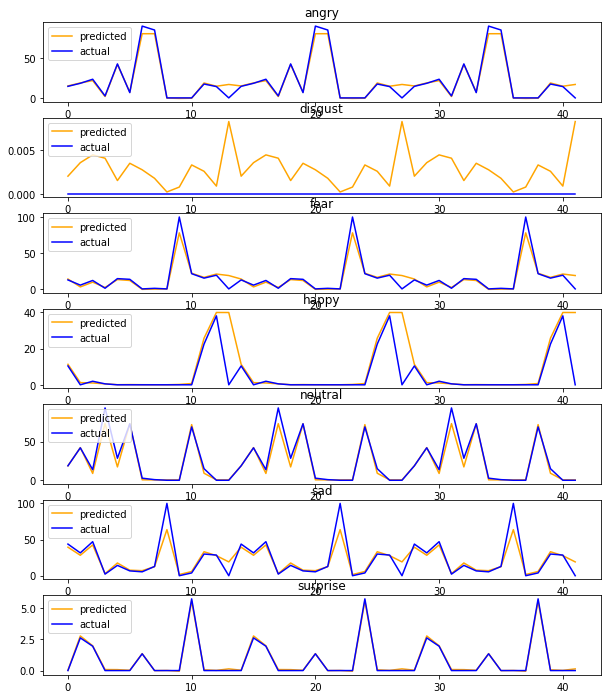

In [9]:
## remove duplicate hours and concatenate into one long array
l_test_y_expand = []
l_final_preds_expand = []
iyn = 0
for il in l_final_preds:
    l_test_y_expand.append(np.concatenate([all_ty[iyn].reshape(-1) for i in range(0, all_ty[iyn].shape[0], 5)], axis = 0))
    l_final_preds_expand.append(np.concatenate([il.reshape(-1) for i in range(0, il.shape[0], 5)], axis = 0))
    iyn = iyn + 1    
    
i = 1
# plot each column
print(len(l_final_preds_expand))
plt.figure(figsize = (10,12))
for il in l_final_preds_expand:
    plt.subplot(len(l_final_preds_expand), 1, i)
    
    plt.plot(il, color = 'orange', label = 'predicted')
    plt.plot(l_test_y_expand[i-1], color = 'blue', label = 'actual')
    plt.title(cols_to_plot[i-1])
    plt.legend(loc="upper left")
    i += 1
plt.show()
    